In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("laptop_data.csv", index_col=0)

In [3]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1252 non-null   object 
 1   TypeName          1252 non-null   object 
 2   Inches            1252 non-null   float64
 3   ScreenResolution  1252 non-null   object 
 4   Cpu               1252 non-null   object 
 5   Ram               1252 non-null   object 
 6   Memory            1252 non-null   object 
 7   Gpu               1252 non-null   object 
 8   OpSys             1252 non-null   object 
 9   Weight            1252 non-null   object 
 10  Price             1252 non-null   float64
dtypes: float64(2), object(9)
memory usage: 117.4+ KB


### Quality Issues
- Drop few brands (Company) that are less than 10
- Extract screen resolution sizes as "3200x768"
- Strip the resolution by x, into [1] and [2], multiply them with inchs to get PPI
- Extrace cpu type as "Intel Core i5 "Other Intel Processors" and "AMD Processors"
- Take the ram size w/o the GB
- Take the first part of the GPU; "Intel", "AMD" or "Nvidia"
- Operating system is either, "macOS", "Windows" or "Other OS".
- Strip kg out of the weight
- Rename flash storage to SSD
- Remove "GB/TB SSD" and add 000 to 1
- Rename "2 in 1 Cnvertible" to "Convertible"

According to [this link](https://www.pcmag.com/news/ssd-vs-hdd-whats-the-difference), SSDs are more expensive than hard drives in terms of dollar per gigabyte. A 1TB internal 2.5-inch hard drive costs between 40 USD and 60 USD, but as of this writing, the very cheapest SSDs of the same capacity and form factor start at around 100 USD. That translates into 4 to 6 cents per gigabyte for the hard drive versus 10 cents per gigabyte for the SSD. The differences are more drastic if you look at high-capacity 3.5-inch hard drives. For example, a 12TB 3.5-inch hard drive that sells for around 300 USD to 350 USD can push the per-gigabyte cost below 3 cents.


### Tidiness Issues
The memory is a tough one to deal with but instead of melting it into two columns ("SSD or HDD"), they willbe attended to, as described above.
- HDD would be converted to SSD
- Additional storage would be stripped off.


### Model Training and stuffs
- Transform all strings to numbers 
- Normalise "Inches", "Screen resolution", "RAM", "Memory", and "Weight"
- ^np.log() so that to get final output we run np.exp()

### Issue 1: Extract Numbers from Weight and RAM 
- Remove GB from RAM size
- Remove kg from weight 

In [6]:
# remove GB from RAM size
df['Ram'] = df['Ram'].str.replace(r'GB', '').astype(int)

In [7]:
# remove kg in weight
df['Weight'] = df['Weight'].str.replace(r'kg', '').astype(float)

### Test

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Issue 2: Rename column values
- Rename "Flash storage" to "SSD"
- Rename "2 in 1 Convertible" to "Convertible"
- Rename "OpSys" to "Windows", "mac OS" or "Other OS"

In [9]:
#rename flash memory to SSD
df["Memory"] = df["Memory"].replace(["Flash Storage", "Hybrid"], "SSD", regex=True)

In [10]:
# rename to convertible
df['TypeName'] = df['TypeName'].replace("2 in 1 Convertible",'Convertible')

In [11]:
# rename operating systems
df["OpSys"] = df["OpSys"].replace(["Windows 10", "Windows 7", "Windows 10 S"], "Windows")
df["OpSys"] = df["OpSys"].replace(["macOS", "Mac OS X"], "mac OS")
df["OpSys"] = df["OpSys"].replace(["Android", "Chrome OS", "Linux", "No OS"], "Other OS")

### Test

In [12]:
df["Memory"].value_counts()

256GB SSD                 533
512GB SSD                 334
128GB SSD +  512GB SSD     93
128GB SSD                  78
256GB SSD +  512GB SSD     73
1TB SSD                    37
32GB SSD                   33
512GB SSD +  512GB SSD     16
64GB SSD                   13
256GB SSD +  1TB SSD       11
16GB SSD                    9
180GB SSD                   5
256GB SSD +  256GB SSD      4
512GB SSD +  1TB SSD        4
128GB SSD +  1TB SSD        2
1TB SSD +  512GB SSD        2
512GB SSD +  256GB SSD      1
64GB SSD +  512GB SSD       1
240GB SSD                   1
8GB SSD                     1
508GB SSD                   1
Name: Memory, dtype: int64

In [13]:
df.groupby(["Company","OpSys", "TypeName"]).count()

Inches  ScreenResolution  Cpu  Ram  Memory  Gpu  \
Company OpSys    TypeName                                                       
Acer    Other OS Convertible       2                 2    2    2       2    2   
                 Gaming            2                 2    2    2       2    2   
                 Netbook           3                 3    3    3       3    3   
                 Notebook         20                20   20   20      20   20   
        Windows  Convertible       6                 6    6    6       6    6   
                 Gaming            6                 6    6    6       6    6   
                 Netbook           2                 2    2    2       2    2   
                 Notebook         58                58   58   58      58   58   
                 Ultrabook         4                 4    4    4       4    4   
Apple   mac OS   Ultrabook        21                21   21   21      21   21   
Asus    Other OS Convertible       2                 2    2    2       2    2   
                 Gaming            3                 3    3    3       3    3   
                 Netbook           1                 1    1    1       1    1   
                 Notebook         11                11   11   11      11   11   
        Windows  Convertible      11                11   11   11      11   11   
                 Gaming           51                51   51   51      51   51   
                 Netbook           3                 3    3    3       3    3   
                 Notebook         56                56   56   56      56   56   
                 Ultrabook        20                20   20   20      20   20   
Dell    Other OS Gaming            1                 1    1    1       1    1   
                 Netbook           1                 1    1    1       1    1   
                 Notebook         33                33   33   33      33   33   
                 Ultrabook         2                 2    2    2       2    2   
        Windows  Convertible      30                30   30   30      30   30   
                 Gaming           39                39   39   39      39   39   
                 Netbook           1                 1    1    1       1    1   
                 Notebook        132               132  132  132     132  132   
                 Ultrabook        47                47   47   47      47   47   
                 Workstation      11                11   11   11      11   11   
HP      Other OS Convertible       2                 2    2    2       2    2   
                 Netbook           1                 1    1    1       1    1   
                 Notebook         13                13   13   13      13   13   
        Windows  Convertible      17                17   17   17      17   17   
                 Gaming           12                12   12   12      12   12   
                 Netbook           8                 8    8    8       8    8   
                 Notebook        171               171  171  171     171  171   
                 Ultrabook        36                36   36   36      36   36   
                 Workstation      14                14   14   14      14   14   
Lenovo  Other OS Convertible       2                 2    2    2       2    2   
                 Gaming            7                 7    7    7       7    7   
                 Netbook           1                 1    1    1       1    1   
                 Notebook         42                42   42   42      42   42   
        Windows  Convertible      46                46   46   46      46   46   
                 Gaming           25                25   25   25      25   25   
                 Netbook           3                 3    3    3       3    3   
                 Notebook        136               136  136  136     136  136   
                 Ultrabook        31                31   31   31      31   31   
                 Workstation       4                 4    4  

### Issue 3: Remove additional storage 

In [14]:
df["Memory"].value_counts()

256GB SSD                 533
512GB SSD                 334
128GB SSD +  512GB SSD     93
128GB SSD                  78
256GB SSD +  512GB SSD     73
1TB SSD                    37
32GB SSD                   33
512GB SSD +  512GB SSD     16
64GB SSD                   13
256GB SSD +  1TB SSD       11
16GB SSD                    9
180GB SSD                   5
256GB SSD +  256GB SSD      4
512GB SSD +  1TB SSD        4
128GB SSD +  1TB SSD        2
1TB SSD +  512GB SSD        2
512GB SSD +  256GB SSD      1
64GB SSD +  512GB SSD       1
240GB SSD                   1
8GB SSD                     1
508GB SSD                   1
Name: Memory, dtype: int64

In [15]:
# strip memory by + and take the first part. Leave out the extra storage.
df["Memory"] = df["Memory"].str.split("+").str[0]

In [16]:
# grab all memory sizes and remove GB SSD
df["Memory"] = df["Memory"].str.strip().str[:-6]

In [17]:
#convert all TB memory sizes to GB (*1000)
df["Memory"] = df["Memory"].replace("1", "1000")

In [18]:
df["Memory"] = df["Memory"].astype(int)

### Test

In [19]:
df["Memory"].value_counts()

256     621
512     355
128     173
1000     39
32       33
64       14
16        9
180       5
240       1
8         1
508       1
Name: Memory, dtype: int64

### Issue 4: Drop company with less than 10 products

In [38]:
# To reduce bias, drop company brands that are less than 10
#dropped = df[df.apply(lambda x: df["Company"].value_counts()[x]>10).values]
# This was done using excel, so the code won't find anything here

### Test

In [21]:
df["Company"].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Name: Company, dtype: int64

### Issue 5: Extract GPU values
- Extract the GPU first names

In [22]:
# split the gpu by space and take 0th (first element)
df["Gpu"] = df["Gpu"].str.split(" ").str[0]

### Test

In [23]:
df.Gpu.value_counts()

Intel     684
Nvidia    389
AMD       179
Name: Gpu, dtype: int64

### Issue 6: CPU values extractions
- Extract CPU values from the whole column values (with much generalisation)

In [24]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.8GHz             1
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Name: Cpu, Length: 111, dtype: int64

In [25]:
#processor replacement
def processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [26]:
# Apply func above to convert all CPU values to 5 unique values
df['Cpu'] = df['Cpu'].apply(lambda x: processor(x))

### Test

In [27]:
df["Cpu"].value_counts()

Intel Core i7            505
Intel Core i5            411
Other Intel Processor    138
Intel Core i3            136
AMD Processor             62
Name: Cpu, dtype: int64

### Issue 7: Screen resolution and inches to PPI
- Extract the screen resolutions and split by x
- Split screen resolution into two columns
- Create new frame "ppi" which takes the calculations for pixels density

While choosing an electronics device, one of the most important property we identify is the screen size. The second, whic is very important, is the display density; which tells us about the image quality we would expect. We always know the screen display size given in inches and the resolution. Having this information, we could easily calculate the pixel density ourselves.

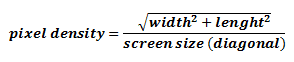

You can get the common resolutions of several devices [here](https://www.sven.de/dpi/) then input it into the model.

In [28]:
# split the resolutions by space and take -1 (last element)
df["ScreenResolution"] = df["ScreenResolution"].str.split(" ").str[-1]

In [29]:
df["ScreenResolution"].value_counts()

1920x1080    813
1366x768     303
3840x2160     39
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
1440x900       4
2880x1800      4
1920x1200      4
Name: ScreenResolution, dtype: int64

In [30]:
# split the screen resolution column into sr_1 and sr_2
df[["sr_1", "sr_2"]] = df["ScreenResolution"].str.split("x", expand=True).astype(int)

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,sr_1,sr_2
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5,8,128,Intel,mac OS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128,Intel,mac OS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,1920x1080,Intel Core i5,8,256,Intel,Other OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7,16,512,AMD,mac OS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5,8,256,Intel,mac OS,1.37,96095.8080,2560,1600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1252 non-null   object 
 1   TypeName          1252 non-null   object 
 2   Inches            1252 non-null   float64
 3   ScreenResolution  1252 non-null   object 
 4   Cpu               1252 non-null   object 
 5   Ram               1252 non-null   int32  
 6   Memory            1252 non-null   int32  
 7   Gpu               1252 non-null   object 
 8   OpSys             1252 non-null   object 
 9   Weight            1252 non-null   float64
 10  Price             1252 non-null   float64
 11  sr_1              1252 non-null   int32  
 12  sr_2              1252 non-null   int32  
dtypes: float64(3), int32(4), object(6)
memory usage: 117.4+ KB


In [33]:
# multiply screen resolution by inches to convert to ppi
df["ppi"] = round((np.sqrt(df["sr_1"]^2 + df["sr_2"]^2))/df["Inches"], 2)

#### Test

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,sr_1,sr_2,ppi
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5,8,128,Intel,mac OS,1.37,71378.6832,2560,1600,4.21
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8,128,Intel,mac OS,1.34,47895.5232,1440,900,2.98
2,HP,Notebook,15.6,1920x1080,Intel Core i5,8,256,Intel,Other OS,1.86,30636.0000,1920,1080,1.98
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7,16,512,AMD,mac OS,1.83,135195.3360,2880,1800,3.64
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5,8,256,Intel,mac OS,1.37,96095.8080,2560,1600,4.21


### Issue 8: Drop unwanted columns
- The screen resolution would be dropped
- drop the sr_1 and sr_2 created earlier
- drop the inches column

In [35]:
df.drop(["Inches","ScreenResolution", "sr_1", "sr_2"], axis=1, inplace=True)

#### Test

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   1252 non-null   object 
 1   TypeName  1252 non-null   object 
 2   Cpu       1252 non-null   object 
 3   Ram       1252 non-null   int32  
 4   Memory    1252 non-null   int32  
 5   Gpu       1252 non-null   object 
 6   OpSys     1252 non-null   object 
 7   Weight    1252 non-null   float64
 8   Price     1252 non-null   float64
 9   ppi       1252 non-null   float64
dtypes: float64(3), int32(2), object(5)
memory usage: 97.8+ KB


### Save final dataset to csv

In [37]:
df.to_csv("ml_laptop_cleaned.csv", index=False)

### Machine Learning process
There are several tasks to perform as we move the ML way. These are to be done in a new Notebook
- Convert strings to integers
- Normalise some of the values

Look for **ml_group_model.ipynb**